# kernel and install graphviz

In [ ]:
# conda activate "[env]"
# conda install ipykernel
# python -m ipykernel install --user --name [env] --display-name "[displayKenrelName]"

In [28]:
#conda install graphviz
# conda install -c conda-forge python-graphviz

# import lib

In [1]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# load iris data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [4]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualization data

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

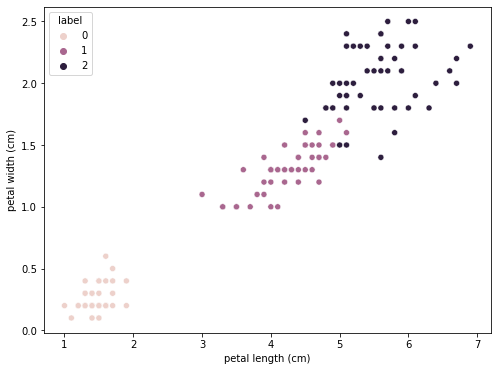

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

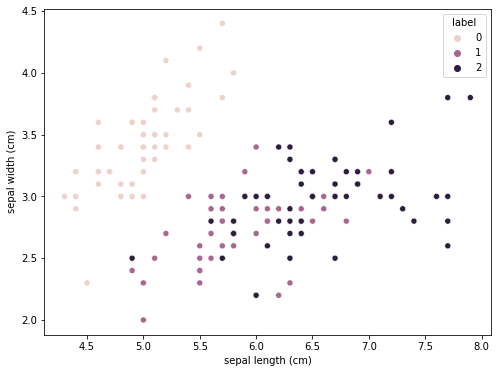

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y="sepal width (cm)", hue= "label")

# Train DecisionTree Classifier

In [6]:
iris = load_iris()
X = iris.data[:, 3:]

In [12]:
X.shape

(150, 1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
#X = df[['petal length (cm)',"petal width (cm)"]] # petal length and width
y = iris.target

In [8]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [15]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([[5, 1.5]])

array([1])

In [17]:
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

# Visualization Decision Tree

In [18]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

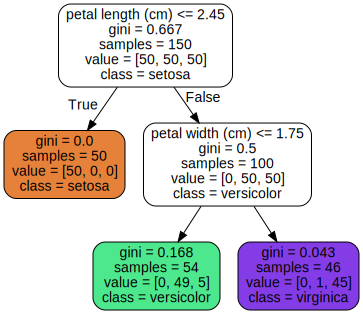

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

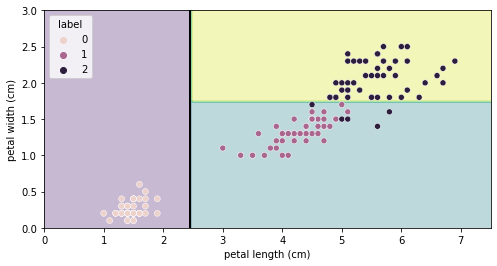

In [15]:
plt.figure(figsize=(8, 4))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3)
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=13)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)

In [29]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

# is it only one DT?

In [22]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

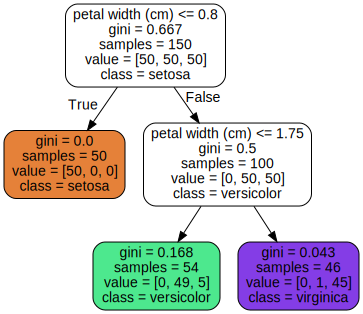

In [23]:
export_graphviz(
        tree_clf_tweaked,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

Text(1.0, 1.8, 'Depth=1')

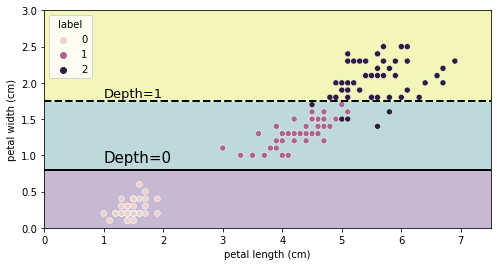

In [24]:
plt.figure(figsize=(8, 4))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf_tweaked.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3)
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")

plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

In [25]:
tree_clf_overfit = DecisionTreeClassifier(max_depth=10, random_state=40)
tree_clf_overfit.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=40)

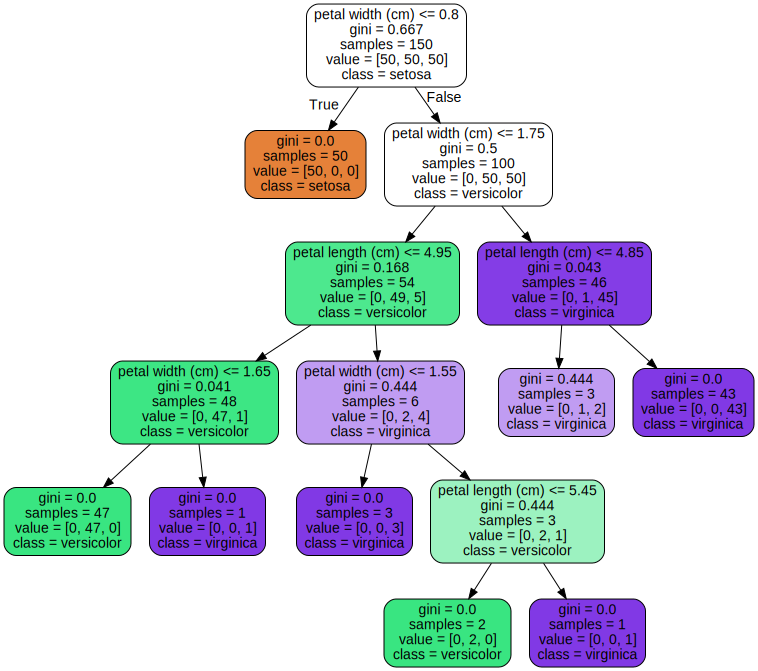

In [26]:
export_graphviz(
        tree_clf_overfit,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

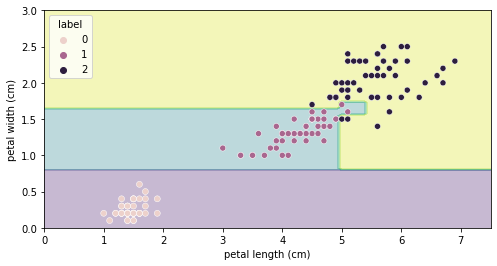

In [27]:
plt.figure(figsize=(8, 4))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf_overfit.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3)
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")

# split dataset(train and test)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, test_size= 0.2, random_state = 11)

In [32]:
clf = DecisionTreeClassifier(max_depth= 10,random_state=42)

In [33]:
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
accuracy_score(pred_train, y_train)

1.0

In [34]:
pred_test = clf.predict(X_test)

In [35]:
pred_test

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [36]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [37]:
print(f"정확도: {accuracy_score(pred_test, y_test)}")

정확도: 0.9333333333333333


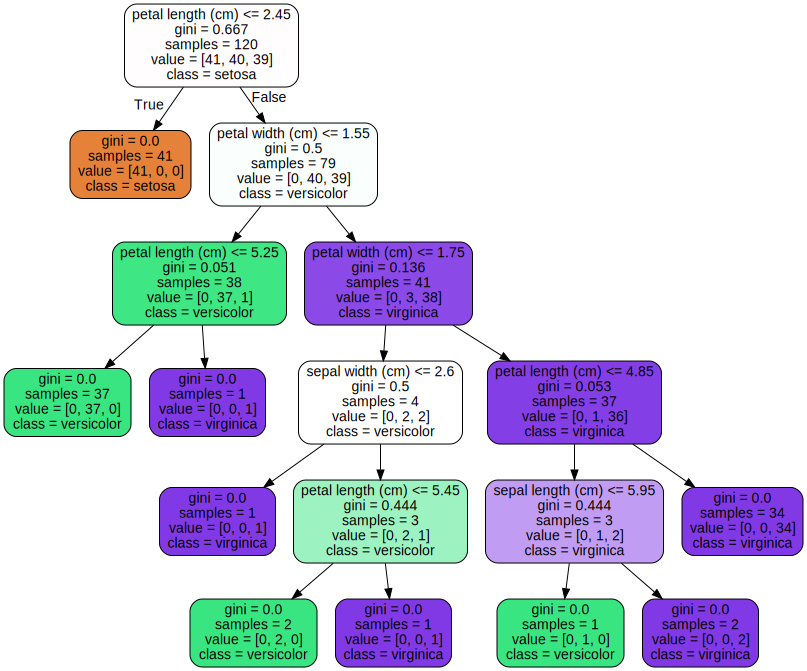

In [38]:
export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [39]:
clf.feature_importances_

array([0.01667014, 0.00833507, 0.55490281, 0.42009198])

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

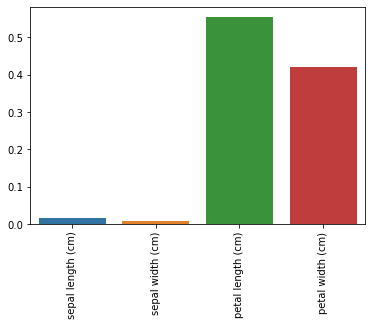

In [41]:
sns.barplot(x = iris.feature_names, y = clf.feature_importances_)
plt.xticks(rotation = 90)

# assignment

### DT를 학습시켜 DT graph를 시각화하고 test set에 대한 정확도를 출력하시오
### 그리고 가장 중요한 feature를 2가지를 선택해서 다시 DT classifier를 학습시키시오.
### 이후  decision boundary를 시각화 하시오.


In [104]:
from sklearn.datasets import load_wine
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state = 11)

# graph(tree) Viz

In [158]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

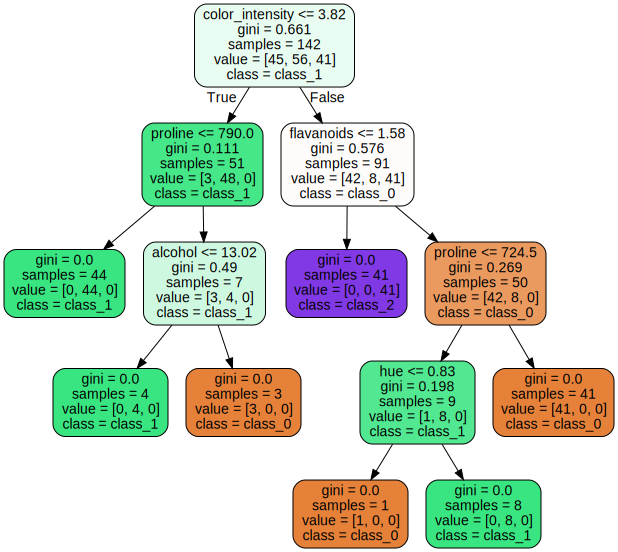

In [105]:
clf = DecisionTreeClassifier(max_depth= 10,random_state=42)

clf.fit(X_train,y_train)

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "wine_tree.dot"),
        feature_names=data.feature_names,
        class_names=data.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "wine_tree.dot"))

# Accuracy

In [106]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(f"train acc: {accuracy_score(pred_train, y_train)}")
print(f"test acc: {accuracy_score(pred_test, y_test)}")

train acc: 1.0
test acc: 0.9444444444444444


# select most important 2 features
#### visualize feature importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

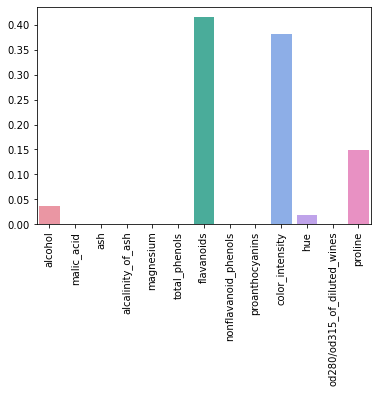

In [89]:
sns.barplot(x = data.feature_names, y = clf.feature_importances_)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'flavanoids'),
  Text(1, 0, 'color_intensity'),
  Text(2, 0, 'proline'),
  Text(3, 0, 'alcohol'),
  Text(4, 0, 'hue'),
  Text(5, 0, 'malic_acid'),
  Text(6, 0, 'ash'),
  Text(7, 0, 'alcalinity_of_ash'),
  Text(8, 0, 'magnesium'),
  Text(9, 0, 'total_phenols'),
  Text(10, 0, 'nonflavanoid_phenols'),
  Text(11, 0, 'proanthocyanins'),
  Text(12, 0, 'od280/od315_of_diluted_wines')])

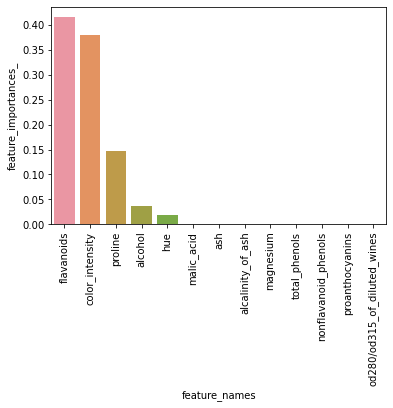

In [113]:
# sorting
imp_df = pd.DataFrame({
    "feature_importances_": clf.feature_importances_,
    "feature_names": data.feature_names
})

sns.barplot(x='feature_names', 
            y="feature_importances_", 
            data=imp_df, 
            order=imp_df.sort_values('feature_importances_',ascending=False).feature_names)
plt.xticks(rotation = 90)

# Train DT by only 2 features

In [187]:
data = load_wine(as_frame=True)
df = data.data
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [182]:
data = load_wine()
df = pd.DataFrame(data = data.data, columns=[data.feature_names])
df['target'] = data.target
df = df[['flavanoids', 'color_intensity', 'target']]
df

,flavanoids,color_intensity,target
0,3.06,5.64,0
1,2.76,4.38,0
2,3.24,5.68,0
3,3.49,7.80,0
4,2.69,4.32,0
...,...,...,...
173,0.61,7.70,2
174,0.75,7.30,2
175,0.69,10.20,2
176,0.68,9.30,2


<AxesSubplot:xlabel='flavanoids', ylabel='color_intensity'>

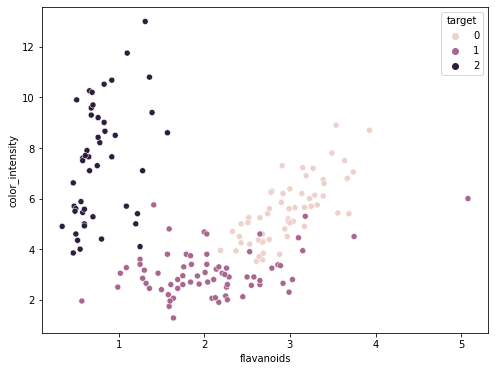

In [188]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='flavanoids', y='color_intensity', hue='target')

C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


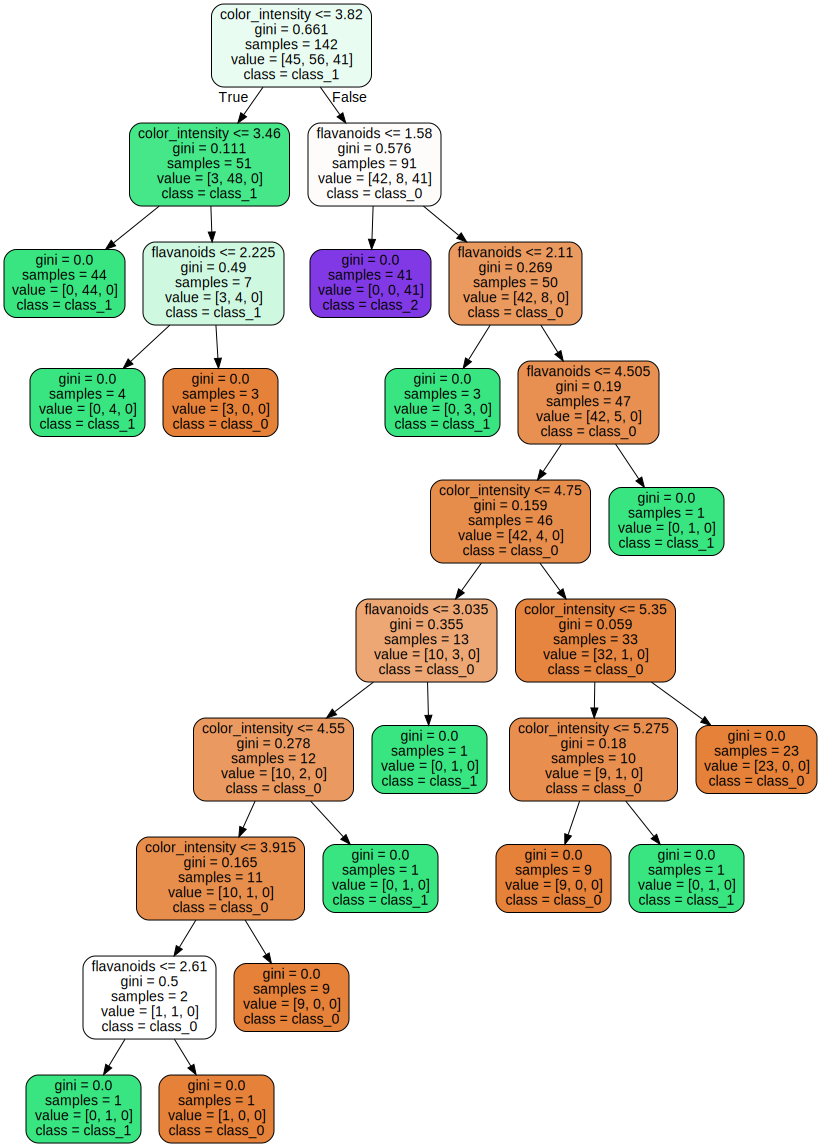

In [170]:
X = df[['flavanoids', 'color_intensity']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

clf = DecisionTreeClassifier(max_depth= 10,random_state=42)

clf.fit(X_train,y_train)

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "wine_tree2.dot"),
        feature_names=['flavanoids', 'color_intensity'],
        class_names=data.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "wine_tree2.dot"))

# Accuracy (2 features DT)

In [171]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print(f"train acc: {accuracy_score(pred_train, y_train)}")
print(f"test acc: {accuracy_score(pred_test, y_test)}")

train acc: 1.0
test acc: 0.9166666666666666


C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
